In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [2]:
def f(x,y):
    return x + 2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1 - np.exp(2*x))/4.

In [15]:
N = 5000
t = np.linspace(0.,100.,N)
Y_ext = Solucion(t)

In [16]:
def GetRK4(f,r0,t, init = False, Npoints = 4):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    y = np.zeros(len(t))
    y[0] = r0[0]
    
    if init == False:
        Npoints = len(t)
        
    for i in range(1,Npoints):
        
        k1 = f(t[i-1],y[i-1])
        k2 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1*h)
        k3 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2*h)
        k4 = f(t[i-1] + h, y[i-1] + k3*h)
        
        y[i] = y[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    
    return y

In [17]:
r0 = [0]
yrk4 = GetRK4(f,r0,t,False,4)

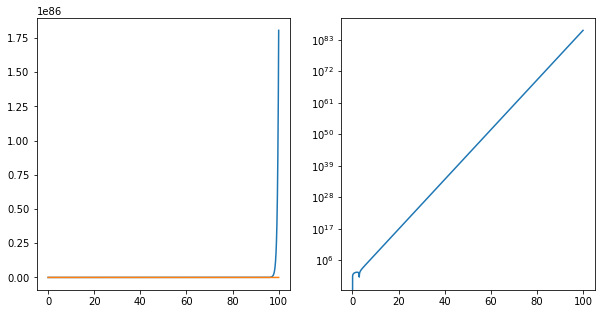

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,Y_ext)
ax.plot(t,yrk4)
ax1.plot(t,np.abs(Y_ext-yrk4))
ax1.set_yscale('log')

In [19]:
#yrk4 = GetRK4(f,r0,t,True,5)

In [20]:
def GetAdams(f,r0,t,orden):
    
    Npoints = orden + 1
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    # Predictor
    y = GetRK4(f,r0,t,True,Npoints)
    # Corrector
    yc = y.copy()
    
    if orden == 2:
        for i in range(Npoints,len(t)):
            
            y[i] = y[i-1] + h*( 23.*f(t[i-1],y[i-1]) - \
                                16.*f(t[i-2],y[i-2]) + \
                                5.* f(t[i-3],y[i-3])
                              )/12.
            yc[i] = y[i]
            
            yc[i] = yc[i-1] + h*( 9.*f(t[i],y[i]) + \
                                 19.*f(t[i-1],y[i-1]) + \
                                 5.*f(t[i-2],y[i-2]) - \
                                 1.*f(t[i-3],y[i-3])
                                )/24.
            
    elif orden == 3:
        for i in range(Npoints,len(t)):
            y[i] = y[i-1] + h*(55.*f(t[i-1],y[i-1]) - \
                               59.*f(t[i-2],y[i-2]) + \
                               37.*f(t[i-3],y[i-3]) - \
                               9. *f(t[i-4],y[i-4]))/24.
            yc[i] = y[i]  
            # Corrector
            yc[i] = yc[i-1] + h*(251.*f(t[i  ],yc[i]) + \
                                 646.*f(t[i-1],yc[i-1]) - \
                                 264.*f(t[i-2],yc[i-2]) + \
                                 106.*f(t[i-3],yc[i-3]) -\
                                 19. *f(t[i-4],yc[i-4]))/720.
    elif orden == 4:
        for i in range(Npoints,len(t)):
            y[i] = y[i-1] + h*(1901.*f(t[i-1],y[i-1]) - \
                               2774.*f(t[i-2],y[i-2]) + \
                               2616.*f(t[i-3],y[i-3]) - \
                               1274.*f(t[i-4],y[i-4]) + \
                               251. *f(t[i-5],y[i-5]))/720.
            yc[i] = y[i]  
            # Corrector
            yc[i] = yc[i-1] + h*(475. *f(t[i  ],yc[i]) + \
                                 1427.*f(t[i-1],yc[i-1]) - \
                                 798. *f(t[i-2],yc[i-2]) + \
                                 482. *f(t[i-3],yc[i-3]) - \
                                 173. *f(t[i-4],yc[i-4]) + \
                                 27.  *f(t[i-5],yc[i-5]))/1440.      
    
    
    return yc,y

In [21]:
def f(x, y):
    return 40. - 0.2*y

In [22]:
def Solucion2(x):
    return 200. - 175.*np.exp(-0.2*x)

In [23]:
Y_ext = Solucion2(t)
r0 = [25]
yrk4 = GetRK4(f,r0,t,False,4)

In [24]:
yc, yp = GetAdams(f,r0,t,orden = 4)

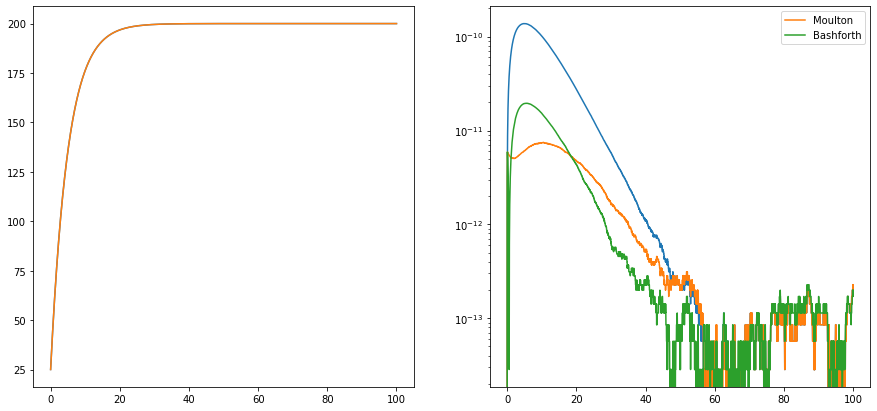

In [25]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,Y_ext)
ax.plot(t,yrk4)
ax1.plot(t,np.abs(Y_ext-yrk4))
ax1.plot(t,np.abs(Y_ext-yc),label='Moulton')
ax1.plot(t,np.abs(Y_ext-yp),label='Bashforth')
ax1.set_yscale('log')
ax1.legend()